# The Vanishing Gradient and Exploding Gradients Problem

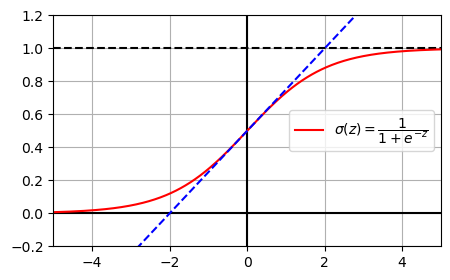

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z=np.linspace(-5,5,400)

plt.figure(figsize=(5,3))
plt.plot([-5,5],[0,0],"k-")
plt.plot([-5,5],[1,1],"k--")
plt.plot([0,0],[-0.2,1.2],"k-")
plt.plot(z,sigmoid(z),"r",label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
plt.plot([-5,5],[-3/4,7/4],"b--")
plt.axis([-5,5,-0.2,1.2])
plt.legend()
plt.grid()
plt.show()

## Xavier and He Initialization

In [5]:
import tensorflow as tf

dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer="he_normal")

In [6]:
he_avg_init=tf.keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")
dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer=he_avg_init)

## Non-saturating Activation Functions

### ReLU

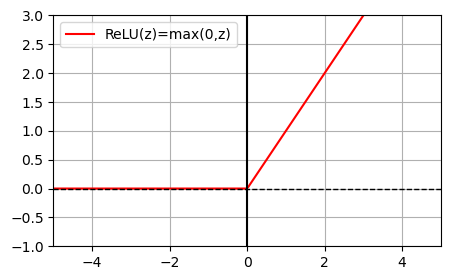

In [9]:
def relu(z):
    return np.maximum(0,z)
z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,relu(z),"r-",label="ReLU(z)=max(0,z)")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.legend()
plt.grid()
plt.show()


### Leaky ReLU

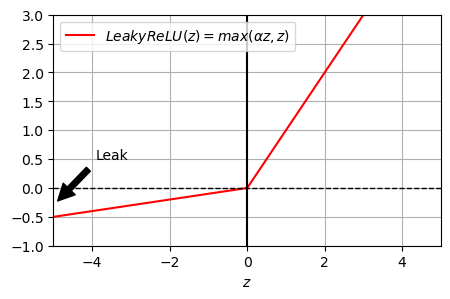

In [11]:
def leaky_relu(z,alpha):
    return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,leaky_relu(z,0.1),"r-",label=r"$LeakyReLU(z)=max(\alpha z,z)$")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=dict(color="black",shrink=0.1),
             fontsize=10, ha="center")
plt.xlabel("$z$")
plt.legend()
plt.grid()
plt.show()


In [12]:
leaky_relu=tf.keras.layers.LeakyReLU(negative_slope=0.2)
dense=tf.keras.layers.Dense(100,activation=leaky_relu,kernel_initializer="he_normal")

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(negative_slope=0.1)
])

### ELU

In [15]:
dense=tf.keras.layers.Dense(200,activation="elu",
                           kernel_initializer="he_normal")

### SELU

In [17]:
dense=tf.keras.layers.Dense(200,activation="selu",
                           kernel_initializer="lecun_normal")


In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [20]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[5000:],y_train_full[5000:]
X_valid,y_valid=X_train_full[:5000],y_train_full[:5000]
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [23]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.4466 - loss: 1.4677 - val_accuracy: 0.6680 - val_loss: 0.8751
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7263 - loss: 0.7472 - val_accuracy: 0.7828 - val_loss: 0.5978
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7848 - loss: 0.6003 - val_accuracy: 0.7930 - val_loss: 0.5632
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8055 - loss: 0.5459 - val_accuracy: 0.8148 - val_loss: 0.5152
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8232 - loss: 0.4895 - val_accuracy: 0.8276 - val_loss: 0.4788


In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [25]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [27]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1941 - loss: 1.9947 - val_accuracy: 0.4000 - val_loss: 1.4425
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4384 - loss: 1.2953 - val_accuracy: 0.5336 - val_loss: 1.1323
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5425 - loss: 1.0681 - val_accuracy: 0.6134 - val_loss: 0.9511
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6093 - loss: 0.9489 - val_accuracy: 0.5802 - val_loss: 1.0387
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6222 - loss: 0.9093 - val_accuracy: 0.6302 - val_loss: 0.9265


## Batch Normalization 

In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [32]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [34]:
history=model.fit(X_train,y_train,
                 epochs=5,
                 validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5812 - loss: 1.2499 - val_accuracy: 0.7972 - val_loss: 0.6009
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7850 - loss: 0.6314 - val_accuracy: 0.8254 - val_loss: 0.5144
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8091 - loss: 0.5531 - val_accuracy: 0.8374 - val_loss: 0.4754
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8227 - loss: 0.5116 - val_accuracy: 0.8446 - val_loss: 0.4524
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8322 - loss: 0.4835 - val_accuracy: 0.8498 - val_loss: 0.4366


In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [36]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [38]:
history=model.fit(X_train,y_train,
                 epochs=5,
                 validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.5261 - loss: 1.4464 - val_accuracy: 0.7774 - val_loss: 0.7181
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.7616 - loss: 0.7422 - val_accuracy: 0.8126 - val_loss: 0.5889
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.7914 - loss: 0.6317 - val_accuracy: 0.8280 - val_loss: 0.5297
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8067 - loss: 0.5740 - val_accuracy: 0.8380 - val_loss: 0.4934
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8184 - loss: 0.5365 - val_accuracy: 0.8466 - val_loss: 0.4684


In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [42]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5148 - loss: 1.4790 - val_accuracy: 0.7654 - val_loss: 0.7376
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.7559 - loss: 0.7610 - val_accuracy: 0.8026 - val_loss: 0.6014
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.7866 - loss: 0.6424 - val_accuracy: 0.8206 - val_loss: 0.5385
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8045 - loss: 0.5820 - val_accuracy: 0.8328 - val_loss: 0.5008
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.8138 - loss: 0.5437 - val_accuracy: 0.8402 - val_loss: 0.4754


## Gradient Clipping

In [44]:
optimizer=tf.keras.optimizers.SGD(clipvalue=1)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer)

In [45]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1)
model.compile(loss="sparse_categorical_crossentropy")

## Reusing Pretrained Models

In [47]:
pos_class_id=class_names.index('Pullover')
neg_class_id=class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y==pos_class_id )|(y==neg_class_id)
    y_A = y[~y_for_B]
    y_B=(y[y_for_B]==pos_class_id).astype(np.float32)
    old_class_ids=list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A==old_class_id]=new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))
      

In [48]:
(X_train_A,y_train_A),(X_train_B,y_train_B)=split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B)=split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B)=split_dataset(X_test,y_test)

X_train_B=X_train_B[:200]
y_train_B=y_train_B[:200]

##### Train model_A

In [50]:
tf.random.set_seed(42)

model_A=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8,activation="softmax")

])

model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               metrics=["accuracy"])
history=model_A.fit(X_train_A,y_train_A,
                   epochs=20,
                   validation_data=(X_valid_A,y_valid_A))
model_A.save("model_A.keras")

Epoch 1/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.4611 - loss: 1.6372 - val_accuracy: 0.7732 - val_loss: 0.7136
Epoch 2/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.7867 - loss: 0.6607 - val_accuracy: 0.8336 - val_loss: 0.5246
Epoch 3/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.8392 - loss: 0.5104 - val_accuracy: 0.8628 - val_loss: 0.4441
Epoch 4/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.8621 - loss: 0.4387 - val_accuracy: 0.8802 - val_loss: 0.3953
Epoch 5/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.8742 - loss: 0.3947 - val_accuracy: 0.8886 - val_loss: 0.3631
Epoch 6/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8809 - loss: 0.3655 - val_accuracy: 0.8933 - val_loss: 0.3399
Epoch 7/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.8863 - loss: 0.3445 - val_accuracy: 0.8982 - val_loss: 0.3226
Epoch 8/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8896 -

##### Train model_B without reusing model_A

In [52]:
tf.random.set_seed(42)

model_B=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

model_B.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               metrics=["accuracy"])
history=model_B.fit(X_train_B,y_train_B,
                   epochs=20,
                   validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2132 - loss: 0.7892 - val_accuracy: 0.2352 - val_loss: 0.7758
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2431 - loss: 0.7607 - val_accuracy: 0.3122 - val_loss: 0.7468
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3091 - loss: 0.7351 - val_accuracy: 0.4100 - val_loss: 0.7211
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4008 - loss: 0.7118 - val_accuracy: 0.5078 - val_loss: 0.6978
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5128 - loss: 0.6901 - val_accuracy: 0.5848 - val_loss: 0.6762
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5822 - loss: 0.6696 - val_accuracy: 0.6618 - val_loss: 0.6561
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6479 - loss: 0.6505 - val_accuracy: 0.7190 - val_loss: 0.6374
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6979 - loss: 0.6328 - val_accuracy: 0.7555 - val_loss: 0.6199
Epoch 9

[0.4719425439834595, 0.8964999914169312]

##### Train model_B using model_A

In [54]:
tf.random.set_seed(42)

In [55]:
model_A=tf.keras.models.load_model("model_A.keras")
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [56]:
model_B_on_A=tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [57]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=False

model_B_on_A.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [58]:
history=model_B_on_A.fit(X_train_B,y_train_B,
                        epochs=5,
                        validation_data=(X_valid_B,y_valid_B))

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4869 - loss: 1.5759 - val_accuracy: 0.5245 - val_loss: 0.9248
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4975 - loss: 0.8826 - val_accuracy: 0.5942 - val_loss: 0.6532
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5757 - loss: 0.6612 - val_accuracy: 0.6930 - val_loss: 0.6185
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6708 - loss: 0.6277 - val_accuracy: 0.7118 - val_loss: 0.6084
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7192 - loss: 0.6168 - val_accuracy: 0.7388 - val_loss: 0.5994


In [59]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True

model_B_on_A.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])


In [60]:
history=model_B_on_A.fit(X_train_B,y_train_B,
                        epochs=15,
                        validation_data=(X_valid_B,y_valid_B))

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7355 - loss: 0.6003 - val_accuracy: 0.8200 - val_loss: 0.5530
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8085 - loss: 0.5565 - val_accuracy: 0.8668 - val_loss: 0.5132
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8444 - loss: 0.5210 - val_accuracy: 0.8928 - val_loss: 0.4796
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8470 - loss: 0.4907 - val_accuracy: 0.9136 - val_loss: 0.4509
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8841 - loss: 0.4643 - val_accuracy: 0.9220 - val_loss: 0.4254
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8927 - loss: 0.4405 - val_accuracy: 0.9303 - val_loss: 0.4027
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9065 - loss: 0.4191 - val_accuracy: 0.9355 - val_loss: 0.3825
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9065 - loss: 0.3998 - val_accuracy: 0.9376 - val_loss: 0.3647
Epoch 9

In [61]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9359 - loss: 0.3022


[0.30583155155181885, 0.9304999709129333]

In [62]:
1-(100-92.60)/(100-89.25)

0.3116279069767437

# Faster Optimizers

In [64]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=[28,28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10,activation="softmax")
    ])
    
def build_and_train_model(optimizer):
    model=build_model()
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])
    return model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_valid,y_valid))   

In [65]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)

In [66]:
history_sgd=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.4313 - loss: 1.7996 - val_accuracy: 0.6994 - val_loss: 0.9007
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.7113 - loss: 0.8468 - val_accuracy: 0.7654 - val_loss: 0.6948
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.7679 - loss: 0.6845 - val_accuracy: 0.7996 - val_loss: 0.6078
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7935 - loss: 0.6085 - val_accuracy: 0.8130 - val_loss: 0.5587
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8089 - loss: 0.5628 - val_accuracy: 0.8232 - val_loss: 0.5270
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8173 - loss: 0.5321 - val_accuracy: 0.8302 - val_loss: 0.5046
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8243 - loss: 0.5098 - val_accuracy: 0.8360 - val_loss: 0.4880
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8287 -

## Momentum Optimization

In [68]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

In [69]:
history_momentum=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.6722 - loss: 0.9585 - val_accuracy: 0.8346 - val_loss: 0.4854
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8284 - loss: 0.4796 - val_accuracy: 0.8470 - val_loss: 0.4339
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.8467 - loss: 0.4296 - val_accuracy: 0.8560 - val_loss: 0.4052
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8573 - loss: 0.4006 - val_accuracy: 0.8600 - val_loss: 0.3851
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.8630 - loss: 0.3798 - val_accuracy: 0.8648 - val_loss: 0.3682
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.8691 - loss: 0.3628 - val_accuracy: 0.8702 - val_loss: 0.3573
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.8730 - loss: 0.3493 - val_accuracy: 0.8752 - val_loss: 0.3495
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8776 -

## Nesterov Accelerated Gradients

In [71]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,
                                 nesterov=True)

In [72]:
history_nesterov=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.6748 - loss: 0.9574 - val_accuracy: 0.8388 - val_loss: 0.4747
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.8357 - loss: 0.4697 - val_accuracy: 0.8554 - val_loss: 0.4228
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.8530 - loss: 0.4194 - val_accuracy: 0.8646 - val_loss: 0.3988
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.8610 - loss: 0.3915 - val_accuracy: 0.8668 - val_loss: 0.3818
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8674 - loss: 0.3725 - val_accuracy: 0.8700 - val_loss: 0.3719
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8731 - loss: 0.3576 - val_accuracy: 0.8714 - val_loss: 0.3635
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8770 - loss: 0.3451 - val_accuracy: 0.8720 - val_loss: 0.3543
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.8810 -

## AdaGrad

In [74]:
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [75]:
history_adagrad=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 778us/step - accuracy: 0.5689 - loss: 1.3230 - val_accuracy: 0.7752 - val_loss: 0.6870
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7804 - loss: 0.6682 - val_accuracy: 0.8128 - val_loss: 0.5788
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8077 - loss: 0.5782 - val_accuracy: 0.8272 - val_loss: 0.5310
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8203 - loss: 0.5346 - val_accuracy: 0.8366 - val_loss: 0.5028
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8281 - loss: 0.5073 - val_accuracy: 0.8400 - val_loss: 0.4840
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.8332 - loss: 0.4888 - val_accuracy: 0.8444 - val_loss: 0.4704
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8374 - loss: 0.4750 - val_accuracy: 0.8460 - val_loss: 0.4598
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.8415 -

## RMSProp

In [77]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [78]:
history_rmsprop=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.7633 - loss: 0.6559 - val_accuracy: 0.8202 - val_loss: 0.5057
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.8518 - loss: 0.4065 - val_accuracy: 0.8392 - val_loss: 0.4604
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8656 - loss: 0.3730 - val_accuracy: 0.8422 - val_loss: 0.4778
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.8729 - loss: 0.3552 - val_accuracy: 0.8416 - val_loss: 0.4683
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.8768 - loss: 0.3478 - val_accuracy: 0.8380 - val_loss: 0.4673
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8805 - loss: 0.3455 - val_accuracy: 0.8466 - val_loss: 0.4945
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.8793 - loss: 0.3443 - val_accuracy: 0.8486 - val_loss: 0.4997
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8799 -

## Adam Optimization

In [80]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [81]:
history_adam=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.7677 - loss: 0.6461 - val_accuracy: 0.8598 - val_loss: 0.3905
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.8570 - loss: 0.3897 - val_accuracy: 0.8688 - val_loss: 0.3547
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.8717 - loss: 0.3459 - val_accuracy: 0.8766 - val_loss: 0.3419
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8819 - loss: 0.3222 - val_accuracy: 0.8796 - val_loss: 0.3451
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8877 - loss: 0.2999 - val_accuracy: 0.8876 - val_loss: 0.3271
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8938 - loss: 0.2853 - val_accuracy: 0.8838 - val_loss: 0.3370
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8992 - loss: 0.2713 - val_accuracy: 0.8822 - val_loss: 0.3424
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.9031 -

### Adamax optimization

In [83]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [84]:
history_adamax=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.7506 - loss: 0.7057 - val_accuracy: 0.8652 - val_loss: 0.3901
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.8555 - loss: 0.4001 - val_accuracy: 0.8764 - val_loss: 0.3407
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8726 - loss: 0.3522 - val_accuracy: 0.8830 - val_loss: 0.3228
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.8817 - loss: 0.3243 - val_accuracy: 0.8850 - val_loss: 0.3173
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8890 - loss: 0.3045 - val_accuracy: 0.8868 - val_loss: 0.3126
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8947 - loss: 0.2882 - val_accuracy: 0.8890 - val_loss: 0.3084
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8999 - loss: 0.2746 - val_accuracy: 0.8880 - val_loss: 0.3083
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.9039 -

### Nadam Optimizer

In [86]:
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [87]:
history_nadam=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7806 - loss: 0.6215 - val_accuracy: 0.8718 - val_loss: 0.3598
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8617 - loss: 0.3761 - val_accuracy: 0.8750 - val_loss: 0.3420
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss: 0.3366 - val_accuracy: 0.8782 - val_loss: 0.3363
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8844 - loss: 0.3105 - val_accuracy: 0.8700 - val_loss: 0.3537
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.2931 - val_accuracy: 0.8770 - val_loss: 0.3357
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8965 - loss: 0.2775 - val_accuracy: 0.8840 - val_loss: 0.3273
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.2649 - val_accuracy: 0.8744 - val_loss: 0.3524
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9057 - loss: 0.2533 - 

### AdamW Optimizer

In [89]:
optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001,weight_decay=1e-5,
                                   beta_1=0.9,beta_2=0.99)

In [90]:
history_adamw=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.7711 - loss: 0.6447 - val_accuracy: 0.8592 - val_loss: 0.3789
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.8537 - loss: 0.3885 - val_accuracy: 0.8688 - val_loss: 0.3653
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8721 - loss: 0.3480 - val_accuracy: 0.8710 - val_loss: 0.3467
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.8808 - loss: 0.3219 - val_accuracy: 0.8826 - val_loss: 0.3340
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.8886 - loss: 0.3017 - val_accuracy: 0.8810 - val_loss: 0.3391
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.8947 - loss: 0.2873 - val_accuracy: 0.8856 - val_loss: 0.3261
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8967 - loss: 0.2749 - val_accuracy: 0.8794 - val_loss: 0.3447
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.9016 -

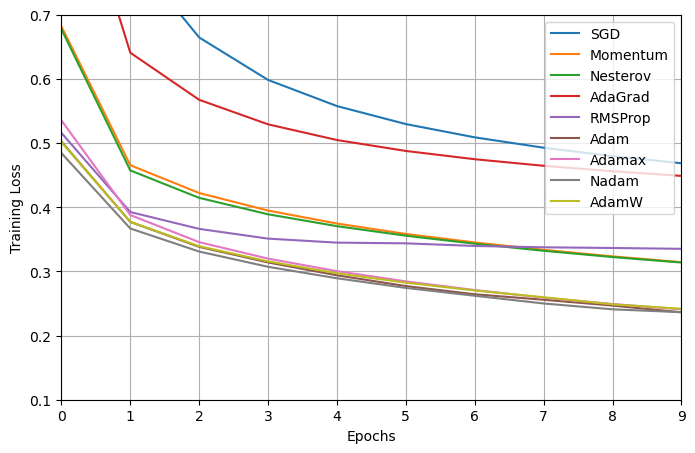

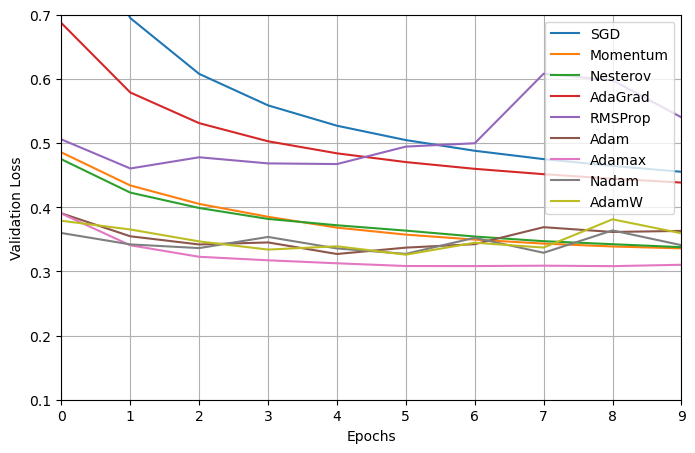

In [91]:
for loss in ("loss","val_loss"):
    plt.figure(figsize=(8, 5))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history,opt_name in zip((history_sgd,history_momentum,history_nesterov,history_adagrad,
                                history_rmsprop,history_adam,history_adamax,history_nadam,
                                history_adamw),opt_names.split()):
        plt.plot(history.history[loss],label=f"{opt_name}")

    plt.grid()
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel({"loss":"Training Loss","val_loss":"Validation Loss"}[loss])
    plt.axis([0, 9, 0.1, 0.7])
    plt.show
        
    

## Learning Rate Scheduling

## Power Scheduling

In [94]:
lr_schedule=tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=1,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [95]:
history_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.6668 - loss: 1.0188 - val_accuracy: 0.8190 - val_loss: 0.5262
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8224 - loss: 0.5001 - val_accuracy: 0.8430 - val_loss: 0.4501
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8423 - loss: 0.4422 - val_accuracy: 0.8550 - val_loss: 0.4179
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8532 - loss: 0.4119 - val_accuracy: 0.8638 - val_loss: 0.3973
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8606 - loss: 0.3923 - val_accuracy: 0.8680 - val_loss: 0.3842
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8655 - loss: 0.3782 - val_accuracy: 0.8690 - val_loss: 0.3753
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.8697 - loss: 0.3670 - val_accuracy: 0.8702 - val_loss: 0.3695
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.8721 -

In [96]:
optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule,beta_1=0.9,beta_2=0.999)

In [97]:
history_adam_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.7455 - loss: 0.7142 - val_accuracy: 0.8368 - val_loss: 0.4743
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8353 - loss: 0.4621 - val_accuracy: 0.8538 - val_loss: 0.4223
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8456 - loss: 0.4293 - val_accuracy: 0.8562 - val_loss: 0.4081
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8561 - loss: 0.3985 - val_accuracy: 0.8600 - val_loss: 0.3900
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8622 - loss: 0.3756 - val_accuracy: 0.8608 - val_loss: 0.3937
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8618 - loss: 0.3693 - val_accuracy: 0.8706 - val_loss: 0.3784
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8693 - loss: 0.3582 - val_accuracy: 0.8720 - val_loss: 0.3955
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8717 -

In [98]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [ ]:
history_adamax_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
 312/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.6513 - loss: 1.0783

In [ ]:
initial_learning_rate=0.1
decay_steps=10000
decay_rate=1

steps=np.arange(100000)
lrs=initial_learning_rate/(1+decay_rate*steps/decay_steps)
lrs2=initial_learning_rate/(1+decay_rate*np.floor(steps/decay_steps))

plt.plot(steps,lrs,"-",label="Staircase = False")
plt.plot(steps,lrs2,"r-",label="Staircase = True")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling")
plt.legend()
plt.show()

## Exponential Scheduling

In [ ]:
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_rate=0.1,
    decay_steps=20000,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_exponential_scheduling=build_and_train_model(optimizer)

In [ ]:
initial_learning_rate=0.01
decay_steps=20000
decay_rate=0.1

steps=np.arange(100000)
lrs=initial_learning_rate*decay_rate**(steps/decay_steps)
lrs2=initial_learning_rate*decay_rate**np.floor(steps/decay_steps)
plt.plot(steps,lrs,"-",label="Staircase = False")
plt.plot(steps,lrs2,"-",label="Staircase = True")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling")
plt.legend()
plt.show()

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0*0.1**(epoch/s)
    return exponential_decay_fn

exponential_decay_fn=exponential_decay(lr0=0.01,s=20)

In [ ]:
tf.random.set_seed(42)

model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [ ]:
lr_scheduler_cb=tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history=model.fit(X_train,y_train,
                 epochs=20,
                 validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler_cb])

In [ ]:
class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self,initial_lr,decay_rate,decay_steps):
        super().__init__()
        self.initial_lr=initial_lr
        self.decay_rate=decay_rate
        self.decay_steps=decay_steps
        self.step=0

    def on_batch_begin(self,batch,logs=None):
        self.step+=1
        new_lr=self.initial_lr*(self.decay_rate**(self.step/self.decay_steps))
        self.model.optimizer.learning_rate.assign(new_lr)
    def on_epoch_end(self,epoch,logs=None):
        logs=logs or {}
        logs['lr']=self.model.optimizer.learning_rate.numpy()

In [ ]:
import math

lr0=0.01
model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [ ]:
batch_size=32
n_epochs=20
decay_steps=n_epochs*math.ceil(len(X_train)/batch_size)
exp_decay=ExponentialDecay(initial_lr=lr0,decay_rate=0.1,decay_steps=decay_steps)

In [ ]:
history=model.fit(
    X_train,y_train,
    epochs=n_epochs,
    validation_data=(X_valid,y_valid),
    callbacks=[exp_decay]
)

## Piecewise Constant Scheduling

In [ ]:
lr_schedule=tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[20_000,40_000],
    values=[0.01,0.005,0.001]  
)

optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_picewise_scheduling=build_and_train_model(optimizer)

In [ ]:
boundary=[20_000,40_000]
values=[0.01,0.005,0.001]  
steps=np.arange(100000)
lrs=np.full(len(steps),values[0])
for boundary, value in zip(boundary, values[1:]):
    lrs[boundary:] = value

plt.plot(steps,lrs,"-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
def piecewise_constants(boundaries,values):
    boundary=np.array([0]+boundaries)
    values=np.array(values)
    def piecewise_constants_fn(epoch):
        return values[(boundary>epoch).argmax()-1]
    return piecewise_constants_fn


In [ ]:
piecewise_constants_fn=piecewise_constants([5, 15], [0.01, 0.005, 0.001])


In [ ]:
lr_shedule_cb=tf.keras.callbacks.LearningRateScheduler(piecewise_constants)

model=build_model()
optimizer=tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,
                 epochs=25,
                 validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler_cb])

## Performance Scheduling

In [ ]:
model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [ ]:
lr_scheduler_cb=tf.keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=2)
history=model.fit(
    X_train,y_train,
    epochs=25,
    validation_data=(X_valid,y_valid),
    callbacks=[lr_scheduler_cb]
)

## 1Cycle Scheduling

In [ ]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self,iterations,max_lr=1e-3,start_lr=None,
                last_lr=None,last_iterations=None):
        self.iterations=iterations
        self.max_lr=max_lr
        self.start_lr=start_lr or max_lr/10
        self.last_lr=last_lr or self.start_lr/1000
        self.last_iterations=last_iterations or iterations//10+1
        self.half_iterations=(iterations-self.last_iterations)//2
        self.iteration=0
    def _interpolate(self,iter1,iter2,lr1,lr2):
        return (lr2-lr1)*(self.iteration-iter1)/(iter2-iter1) + lr1
    def on_batch_begin(self,batch,logs):
        if self.iteration<self.half_iterations:
            lr=self._interpolate(0,self.half_iterations,self.start_lr,self.max_lr)
        elif self.iteration<2*self.half_iterations:
            lr=self._interpolate(self.half_iterations,2*self.half_iterations,self.max_lr,self.start_lr)
        else:
            lr=self._interpolate(2* self.half_iterations,self.iterations,self.start_lr,self.last_lr)
        self.iteration+=1
        self.model.optimizer.learning_rate=lr

In [ ]:
model=build_model()
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"])
n_epochs=25
batch_size=128

onecycle=OneCycleScheduler(math.ceil(len(X_train)/batch_size)*n_epochs,
                          max_lr=0.1)
history=model.fit(X_train,y_train,
                 epochs=n_epochs,
                 validation_data=(X_valid,y_valid),
                 callbacks=[onecycle])


# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ Regularization

In [ ]:
layer=tf.keras.layers.Dense(200,activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [ ]:
from functools import partial

Regularized_dense=partial(
    tf.keras.layers.Dense,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.01)
)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    Regularized_dense(100),
    Regularized_dense(100),
    Regularized_dense(10,activation="softmax",kernel_initializer="glorot_normal")
])

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])
history=model.fit(X_train,y_train,
         epochs=15,
         validation_data=(X_valid,y_valid))

## Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer([28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])
history=model.fit(X_train,y_train,
         epochs=10,
         validation_data=(X_valid,y_valid))

In [ ]:
model.evaluate(X_train,y_train)

In [ ]:
model.evaluate(X_test,y_test)

## MC Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas=np.stack([model(X_test,training=True)
                  for sample in range(100)])
y_proba=y_probas.mean(axis=0)

In [ ]:
model.predict(X_test[:1]).round(3)

In [ ]:
y_proba[0].round(3)

In [ ]:
y_std=y_probas.std(axis=0)
y_std[0].round(2)

In [ ]:
y_pred=y_proba.argmax(axis=1)
accuracy=(y_pred==y_test).sum()/len(y_test)
accuracy

In [ ]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self,inputs,training=None):
        return super().call(inputs,training=True)

In [ ]:
Dropout=tf.keras.layers.Dropout
mc_model=tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer,Dropout) else layer for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [ ]:
mc_model.summary()

In [ ]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
        for sample in range(100)],axis=0).round(2)

## Max norm

In [ ]:
dense=tf.keras.layers.Dense(100,activation="relu",
                           kernel_initializer="he_normal",
                           kernel_constraint=tf.keras.constraints.max_norm(1.))

In [ ]:
MaxNormDense=partial(tf.keras.layers.Dense,
                    activation="relu",
                    kernel_initializer="he_normal",
                    kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10,activation="softmax")
])

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

history=model.fit(X_train,y_train,
                 epochs=10,
                 validation_data=(X_valid,y_valid))